In [4]:

import requests
import sqlite3

url = "https://openlibrary.org/subjects/python.json?limit=50"
response = requests.get(url)
data = response.json()['works']

conn = sqlite3.connect('books.db')
cursor = conn.cursor()

# DROP old table
cursor.execute("DROP TABLE IF EXISTS books")

# CREATE fresh table with 3 columns
cursor.execute("""
CREATE TABLE books (
    title TEXT,
    author TEXT,
    year INTEGER
)
""")

# INSERT data
for book in data:
    title = book.get('title')
    author = book['authors'][0]['name'] if book.get('authors') else 'Unknown'
    year = book.get('first_publish_year')

    cursor.execute(
        "INSERT INTO books (title, author, year) VALUES (?, ?, ?)",
        (title, author, year)
    )

conn.commit()

# DISPLAY data
for row in cursor.execute("SELECT * FROM books"):
    print(row)

conn.close()


('Learning Python', 'Mark Lutz', 1999)
('Python', 'Mark Lutz', 1998)
('Think Python', 'Allen B. Downey', 2009)
('Introduction to Python for Science and Engineering', 'David J. Pine', 2018)
('Python for bioinformatics', 'Sebastian Bassi', 2009)
('Programming Python', 'Mark Lutz', 1996)
('Mining the Social Web', 'Matthew A. Russell', 2011)
('Head First Python', 'Paul Barry', 2010)
('Think Stats', 'Allen B. Downey', 2011)
('Python For Data Analysis', 'Wes McKinney', 2012)
('Python in a Nutshell', 'Alex Martelli', 2002)
('Automate the Boring Stuff with Python', 'Al Sweigart', 2015)
('Making music with computers', 'Bill Manaris', 2013)
('Python Cookbook', 'Alex Martelli', 2002)
('Fluent Python', 'Luciano Ramalho', 2015)
('Tour of Data Science', 'Nailong Zhang', 2020)
('Natural Language Processing With Python', 'Edward Loper', 2009)
('Twisted Network Programming Essentials', 'Abe Fettig', 2005)
('Python for Everyone', 'Cay S. Horstmann', 2013)
('Introduction to Modeling and Simulation with M

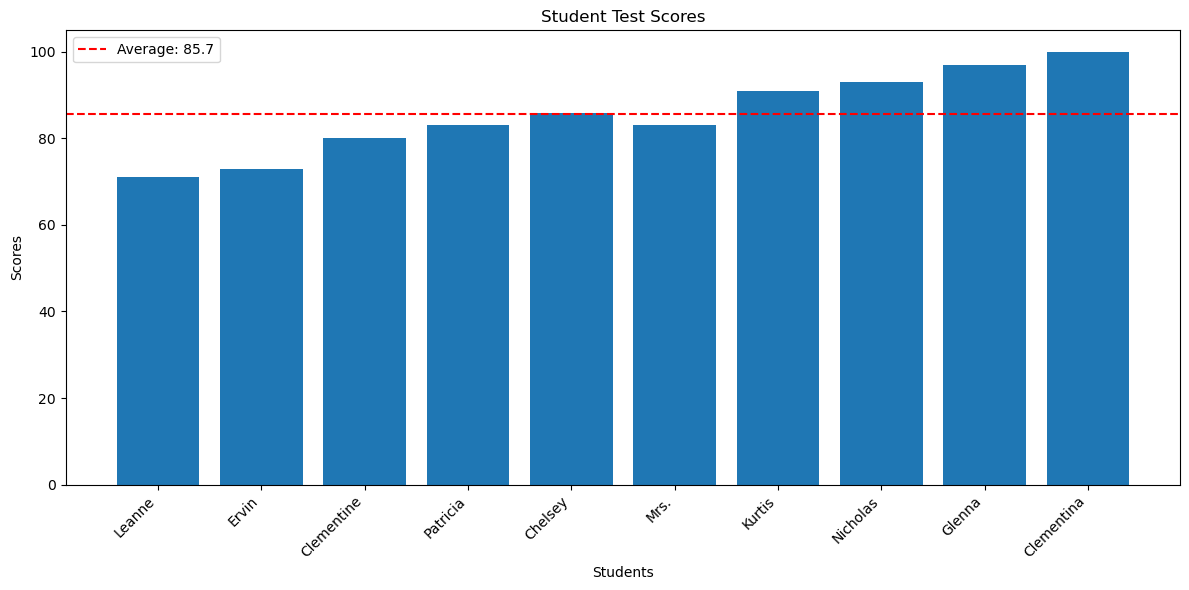

In [18]:
import requests
import matplotlib.pyplot as plt

# 1. API Call (Real HTTP Request)
response = requests.get("https://jsonplaceholder.typicode.com/users")
users = response.json()

# Convert to student data
data = []
for user in users[:10]:
    score = 65 + (user['id'] * 3) + (len(user['name']) % 10)
    if score > 100:
        score = 100
    data.append({
        'name': user['name'].split()[0],
        'score': score
    })

# 2. Calculate Average
total = sum(student['score'] for student in data)
average = total / len(data)

# 3. Create Chart
names = [student['name'] for student in data]
scores = [student['score'] for student in data]

plt.figure(figsize=(12, 6))
plt.bar(names, scores)
plt.axhline(y=average, color='red', linestyle='--', label=f'Average: {average:.1f}')
plt.xlabel('Students')
plt.ylabel('Scores')
plt.title('Student Test Scores')
plt.xticks(rotation=45, ha='right')  # Fix overlapping names
plt.legend()
plt.tight_layout()
plt.show()



In [20]:
import pandas as pd

# Use the full path to your Downloads folder
df = pd.read_csv('/Users/prince/Downloads/data.csv') 
df


,Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
0,1,DD37Cf93aecA6Dc,Sheryl,Baxter,Rasmussen Group,East Leonard,Chile,229.077.5154,397.884.0519x718,zunigavanessa@smith.info,2020-08-24,http://www.stephenson.com/
1,2,1Ef7b82A4CAAD10,Preston,Lozano,Vega-Gentry,East Jimmychester,Djibouti,5153435776,686-620-1820x944,vmata@colon.com,2021-04-23,http://www.hobbs.com/
2,3,6F94879bDAfE5a6,Roy,Berry,Murillo-Perry,Isabelborough,Antigua and Barbuda,+1-539-402-0259,(496)978-3969x58947,beckycarr@hogan.com,2020-03-25,http://www.lawrence.com/
3,4,5Cef8BFA16c5e3c,Linda,Olsen,"Dominguez, Mcmillan and Donovan",Bensonview,Dominican Republic,001-808-617-6467x12895,+1-813-324-8756,stanleyblackwell@benson.org,2020-06-02,http://www.good-lyons.com/
4,5,053d585Ab6b3159,Joanna,Bender,"Martin, Lang and Andrade",West Priscilla,Slovakia (Slovak Republic),001-234-203-0635x76146,001-199-446-3860x3486,colinalvarado@miles.net,2021-04-17,https://goodwin-ingram.com/
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,cb8E23e48d22Eae,Karl,Greer,Carey LLC,East Richard,Guyana,(188)169-1674x58692,001-841-293-3519x614,hhart@jensen.com,2022-01-30,http://hayes-perez.com/
96,97,CeD220bdAaCfaDf,Lynn,Atkinson,"Ware, Burns and Oneal",New Bradview,Sri Lanka,+1-846-706-2218,605.413.3198,vkemp@ferrell.com,2021-07-10,https://novak-allison.com/
97,98,28CDbC0dFe4b1Db,Fred,Guerra,Schmitt-Jones,Ortegaland,Solomon Islands,+1-753-067-8419x7170,+1-632-666-7507x92121,swagner@kane.org,2021-09-18,https://www.ross.com/
98,99,c23d1D9EE8DEB0A,Yvonne,Farmer,Fitzgerald-Harrell,Lake Elijahview,Aruba,(530)311-9786,001-869-452-0943x12424,mccarthystephen@horn-green.biz,2021-08-11,http://watkins.info/


In [26]:
import pandas as pd

# Use the full path to your Downloads folder
df = pd.read_csv('/Users/prince/Downloads/data.csv')

In [30]:
import sqlite3

conn = sqlite3.connect("customers.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS customers (
    idx INTEGER,
    customer_id TEXT,
    first_name TEXT,
    last_name TEXT,
    company TEXT,
    city TEXT,
    country TEXT,
    phone1 TEXT,
    phone2 TEXT,
    email TEXT,
    subscription_date TEXT,
    website TEXT
)
""")

conn.commit()
conn.close()

print("Customers table created successfully!")



Customers table created successfully!


In [35]:
import csv
import sqlite3

conn = sqlite3.connect("customers.db")
cursor = conn.cursor()

with open("/Users/prince/Downloads/data.csv", "r") as file:
    reader = csv.DictReader(file)
    
    for row in reader:
        cursor.execute("""
            INSERT INTO customers VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        """, (
            row["Index"],
            row["Customer Id"],
            row["First Name"],
            row["Last Name"],
            row["Company"],
            row["City"],
            row["Country"],
            row["Phone 1"],
            row["Phone 2"],
            row["Email"],
            row["Subscription Date"],
            row["Website"]
        ))

conn.commit()
conn.close()

print("CSV data inserted successfully!")


CSV data inserted successfully!


In [39]:
import sqlite3

conn = sqlite3.connect("customers.db")
cursor = conn.cursor()


cursor.execute("SELECT * FROM customers LIMIT 100")
rows = cursor.fetchall()

for row in rows:
    print(row)

conn.close()


(1, 'DD37Cf93aecA6Dc', 'Sheryl', 'Baxter', 'Rasmussen Group', 'East Leonard', 'Chile', '229.077.5154', '397.884.0519x718', 'zunigavanessa@smith.info', '2020-08-24', 'http://www.stephenson.com/')
(2, '1Ef7b82A4CAAD10', 'Preston', 'Lozano', 'Vega-Gentry', 'East Jimmychester', 'Djibouti', '5153435776', '686-620-1820x944', 'vmata@colon.com', '2021-04-23', 'http://www.hobbs.com/')
(3, '6F94879bDAfE5a6', 'Roy', 'Berry', 'Murillo-Perry', 'Isabelborough', 'Antigua and Barbuda', '+1-539-402-0259', '(496)978-3969x58947', 'beckycarr@hogan.com', '2020-03-25', 'http://www.lawrence.com/')
(4, '5Cef8BFA16c5e3c', 'Linda', 'Olsen', 'Dominguez, Mcmillan and Donovan', 'Bensonview', 'Dominican Republic', '001-808-617-6467x12895', '+1-813-324-8756', 'stanleyblackwell@benson.org', '2020-06-02', 'http://www.good-lyons.com/')
(5, '053d585Ab6b3159', 'Joanna', 'Bender', 'Martin, Lang and Andrade', 'West Priscilla', 'Slovakia (Slovak Republic)', '001-234-203-0635x76146', '001-199-446-3860x3486', 'colinalvarado@m